# RENEWIND - NEURAL NETWORKS

## Problem Statement

## *Importing Package*

In [1]:
!pip install tensorflow

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
!pip install bayesian-optimization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.regularizers import l1,l2
from sklearn.utils.class_weight import compute_class_weight
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,precision_recall_curve



## MOUNTING GOOGLE COLAB
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/04_Introduction To Neural Network/Final_Project/
!ls

Mounted at /content/drive/
/content/drive/MyDrive/PGP_AI_ML_GREAT_LEARNING/04_Introduction To Neural Network/Final_Project
'Problem Statement.docx'   ReneWind   ReneWind_v1_0.ipynb   sgd.png   Test.csv	 Train.csv


#Dataset Load And Overview

In [ ]:
class DatasetLoadAndOverview:
  def __init__(self):
    self.df_Train = pd.read_csv('Train.csv')
    self.df_Test = pd.read_csv('Test.csv')

  def LoadDataset(self):
    return self.df_Train, self.df_Test

  def DataSetOverView(self):
    df_overview = pd.DataFrame()
    df_overview_train = pd.DataFrame({'Type':['Train'],'Rows':[self.df_Train.shape[0]],'Columns':[self.df_Train.shape[1]],
                                      'Sum_of_Null':[self.df_Train.isnull().sum().sum()] , 'Duplicate_Entry_Count':[self.df_Train.duplicated().sum()]

                                      })
    df_overview_test = pd.DataFrame({'Type':['Test'], 'Rows':[self.df_Test.shape[0]], 'Columns':[self.df_Test.shape[1]],
                                     'Sum_of_Null':[self.df_Test.isnull().sum().sum()] , 'Duplicate_Entry_Count':[self.df_Test.duplicated().sum()]
                                    })

    df_overview = pd.concat([df_overview_train,df_overview_test],axis=0)
    return df_overview


ovObject = DatasetLoadAndOverview()
df_Train, df_Test = ovObject.LoadDataset()

In [ ]:
ovObject.DataSetOverView()

,Type,Rows,Columns,Sum_of_Null,Duplicate_Entry_Count
0,Train,20000,41,36,0
0,Test,5000,41,11,0


## Train dataset OverView

In [ ]:
df_Train.describe().round().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.0,3.0,-12.0,-3.0,-1.0,2.0,15.0
V2,19982.0,0.0,3.0,-12.0,-2.0,0.0,3.0,13.0
V3,20000.0,2.0,3.0,-11.0,0.0,2.0,5.0,17.0
V4,20000.0,-0.0,3.0,-15.0,-2.0,-0.0,2.0,13.0
V5,20000.0,-0.0,2.0,-9.0,-2.0,-0.0,1.0,8.0
V6,20000.0,-1.0,2.0,-10.0,-2.0,-1.0,0.0,7.0
V7,20000.0,-1.0,2.0,-8.0,-2.0,-1.0,0.0,8.0
V8,20000.0,-1.0,3.0,-16.0,-3.0,-0.0,2.0,12.0
V9,20000.0,-0.0,2.0,-9.0,-1.0,-0.0,1.0,8.0
V10,20000.0,-0.0,2.0,-10.0,-1.0,0.0,1.0,8.0


In [ ]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

## Test Overview

In [ ]:
df_Test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.0,-0.277622,3.466280,-12.381696,-2.743691,-0.764767,1.831313,13.504352
V2,4994.0,0.397928,3.139562,-10.716179,-1.649211,0.427369,2.444486,14.079073
V3,5000.0,2.551787,3.326607,-9.237940,0.314931,2.260428,4.587000,15.314503
V4,5000.0,-0.048943,3.413937,-14.682446,-2.292694,-0.145753,2.166468,12.140157
V5,5000.0,-0.080120,2.110870,-7.711569,-1.615238,-0.131890,1.341197,7.672835
V6,5000.0,-1.042138,2.005444,-8.924196,-2.368853,-1.048571,0.307555,5.067685
V7,5000.0,-0.907922,1.769017,-8.124230,-2.054259,-0.939695,0.212228,7.616182
V8,5000.0,-0.574592,3.331911,-12.252731,-2.642088,-0.357943,1.712896,10.414722
V9,5000.0,0.030121,2.174139,-6.785495,-1.455712,-0.079891,1.449548,8.850720
V10,5000.0,0.018524,2.145437,-8.170956,-1.353320,0.166292,1.511248,6.598728


In [ ]:
df_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

## Impute the Missing value


In [ ]:
df_cleaned_Train = df_Train.dropna()
df_cleaned_Test = df_Test.dropna()

In [ ]:
df_cleaned_Train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19964 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19964 non-null  float64
 1   V2      19964 non-null  float64
 2   V3      19964 non-null  float64
 3   V4      19964 non-null  float64
 4   V5      19964 non-null  float64
 5   V6      19964 non-null  float64
 6   V7      19964 non-null  float64
 7   V8      19964 non-null  float64
 8   V9      19964 non-null  float64
 9   V10     19964 non-null  float64
 10  V11     19964 non-null  float64
 11  V12     19964 non-null  float64
 12  V13     19964 non-null  float64
 13  V14     19964 non-null  float64
 14  V15     19964 non-null  float64
 15  V16     19964 non-null  float64
 16  V17     19964 non-null  float64
 17  V18     19964 non-null  float64
 18  V19     19964 non-null  float64
 19  V20     19964 non-null  float64
 20  V21     19964 non-null  float64
 21  V22     19964 non-null  float64
 22  V23

In [ ]:
df_cleaned_Test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4989 non-null   float64
 1   V2      4989 non-null   float64
 2   V3      4989 non-null   float64
 3   V4      4989 non-null   float64
 4   V5      4989 non-null   float64
 5   V6      4989 non-null   float64
 6   V7      4989 non-null   float64
 7   V8      4989 non-null   float64
 8   V9      4989 non-null   float64
 9   V10     4989 non-null   float64
 10  V11     4989 non-null   float64
 11  V12     4989 non-null   float64
 12  V13     4989 non-null   float64
 13  V14     4989 non-null   float64
 14  V15     4989 non-null   float64
 15  V16     4989 non-null   float64
 16  V17     4989 non-null   float64
 17  V18     4989 non-null   float64
 18  V19     4989 non-null   float64
 19  V20     4989 non-null   float64
 20  V21     4989 non-null   float64
 21  V22     4989 non-null   float64
 22  V23  

In [ ]:
df_cleaned_Train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19964.0,-0.271156,3.442155,-11.876451,-2.737380,-0.746118,1.841050,15.493002
V2,19964.0,0.440507,3.150895,-12.319951,-1.640580,0.470788,2.544489,13.089269
V3,19964.0,2.485454,3.390736,-10.708139,0.207329,2.255786,4.569975,17.090919
V4,19964.0,-0.082647,3.432260,-15.082052,-2.345815,-0.135241,2.130757,13.236381
V5,19964.0,-0.055028,2.105122,-8.603361,-1.537210,-0.103365,1.339176,8.133797
V6,19964.0,-0.995463,2.041211,-10.227147,-2.347919,-1.000852,0.380444,6.975847
V7,19964.0,-0.879029,1.761840,-7.949681,-2.031207,-0.917179,0.223695,8.006091
V8,19964.0,-0.548384,3.296765,-15.657561,-2.647433,-0.390276,1.726303,11.679495
V9,19964.0,-0.016578,2.161033,-8.596313,-1.495193,-0.066895,1.409579,8.137580
V10,19964.0,-0.012416,2.193498,-9.853957,-1.412478,0.102264,1.477754,8.108472


In [ ]:
df_cleaned_Train.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19964.0,-0.271156,3.442155,-11.876451,-2.737380,-0.746118,1.841050,15.493002
V2,19964.0,0.440507,3.150895,-12.319951,-1.640580,0.470788,2.544489,13.089269
V3,19964.0,2.485454,3.390736,-10.708139,0.207329,2.255786,4.569975,17.090919
V4,19964.0,-0.082647,3.432260,-15.082052,-2.345815,-0.135241,2.130757,13.236381
V5,19964.0,-0.055028,2.105122,-8.603361,-1.537210,-0.103365,1.339176,8.133797
V6,19964.0,-0.995463,2.041211,-10.227147,-2.347919,-1.000852,0.380444,6.975847
V7,19964.0,-0.879029,1.761840,-7.949681,-2.031207,-0.917179,0.223695,8.006091
V8,19964.0,-0.548384,3.296765,-15.657561,-2.647433,-0.390276,1.726303,11.679495
V9,19964.0,-0.016578,2.161033,-8.596313,-1.495193,-0.066895,1.409579,8.137580
V10,19964.0,-0.012416,2.193498,-9.853957,-1.412478,0.102264,1.477754,8.108472


# DataSplit and Scaling

In [ ]:
class DatasetSplitAndScale:
  def __init__(self, df_Train, df_Test):
    self.df_Train = df_Train
    self.df_Test = df_Test

  def SplitAndScale(self):
    Feature_Train = self.df_Train.drop(['Target'], axis=1)
    Target_Train = self.df_Train['Target']

    Feature_Test = self.df_Test.drop(['Target'], axis=1)
    Target_Test = self.df_Test['Target']

    scaler_obj = StandardScaler()
    pca_obj = PCA(n_components=0.95)

    pipeline_obj = Pipeline(steps = [('scaler',scaler_obj), ('pca',pca_obj)])

    # Feature_Train_Scaled = scaler_obj.fit_transform(Feature_Train)
    # Feature_Test_Scaled = scaler_obj.transform(Feature_Test)

    Feature_Train_Scaled = pipeline_obj.fit_transform(Feature_Train)
    Feature_Test_Scaled = pipeline_obj.transform(Feature_Test)

    return Feature_Train, Target_Train, Feature_Test, Target_Test, Feature_Train_Scaled, Feature_Test_Scaled




ObjSplit = DatasetSplitAndScale(df_cleaned_Train, df_cleaned_Test)
Feature_Train, Target_Train, Feature_Test, Target_Test, Feature_Train_Scaled, Featurre_Test_Scaled = ObjSplit.SplitAndScale()
print('Feature Train Shape: ',Feature_Train.shape)
print('Target Train Shape: ', Target_Train.shape)
print('Feature Test Shape: ', Feature_Test.shape)
print('Target Test Shape: ', Target_Test.shape)
print('Feature Train Scaled Shape: ', Feature_Train_Scaled.shape)
print('Feature Test Scaled Shape: ',  Featurre_Test_Scaled.shape)

Feature Train Shape:  (19964, 40)
Target Train Shape:  (19964,)
Feature Test Shape:  (4989, 40)
Target Test Shape:  (4989,)
Feature Train Scaled Shape:  (19964, 9)
Feature Test Scaled Shape:  (4989, 9)


# Model Building

## Neural Model with SGD Optimizer

In [ ]:
tf.random.set_seed(42)
model_sgd = Sequential()
model_sgd.add(Dense(128, input_dim = Feature_Train.shape[1], activation ='relu'))
model_sgd.add(Dense(64, activation='relu'))
model_sgd.add(Dense(32, activation='relu'))
model_sgd.add(Dense(1, activation='sigmoid'))

Optimzer = SGD(learning_rate = 0.01)
model_sgd.compile(loss = 'binary_crossentropy', optimizer= Optimzer, metrics = ['accuracy', 'Precision', 'Recall', 'AUC'])

In [ ]:
out_model_sgd = model_sgd.fit(Feature_Train_Scaled, Target_Train, epochs=100, verbose=1, batch_size=32, validation_split=0.2)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - AUC: 0.6299 - Precision: 0.0638 - Recall: 0.0654 - accuracy: 0.8817 - loss: 0.3182 - val_AUC: 0.8641 - val_Precision: 0.9706 - val_Recall: 0.1435 - val_accuracy: 0.9504 - val_loss: 0.1544
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.8793 - Precision: 0.9732 - Recall: 0.2701 - accuracy: 0.9589 - loss: 0.1418 - val_AUC: 0.9129 - val_Precision: 0.9065 - val_Recall: 0.4217 - val_accuracy: 0.9642 - val_loss: 0.1187
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - AUC: 0.9267 - Precision: 0.9479 - Recall: 0.4852 - accuracy: 0.9699 - loss: 0.1088 - val_AUC: 0.9299 - val_Precision: 0.9286 - val_Recall: 0.5652 - val_accuracy: 0.9725 - val_loss: 0.1001
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - AUC: 0.9438 - Precision: 0.9468 - Recall: 0.6147 - accuracy: 0.9767 - loss: 0.0904 - val_AUC: 0.9396 - val_Precision: 0.9554 - val_Recall: 0.6522 - val_accuracy: 0.9782 - val_loss: 0.0881
Epoch 5/100
500/500 ━━━━━━━━

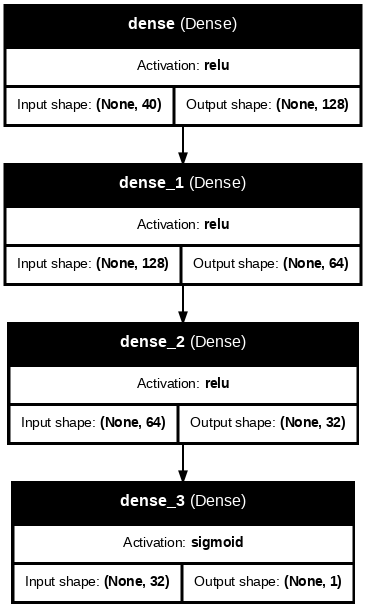

In [ ]:
!pip install graphviz
from tensorflow.keras.utils import plot_model
plot_model(model_sgd, to_file='sgd.png', show_shapes = True, show_layer_names = True,dpi=72, show_layer_activations=True)
from IPython.display import Image
Image(filename='sgd.png')

In [ ]:
for key in out_model_sgd.history.keys():
  val = out_model_sgd.history[key]
  print(f'History {key}: {val}')

History AUC: [0.7398353219032288, 0.8932285308837891, 0.9260035753250122, 0.9378436207771301, 0.9430269598960876, 0.9467649459838867, 0.949348509311676, 0.9513587355613708, 0.9530126452445984, 0.9538756608963013, 0.9552154541015625, 0.9561500549316406, 0.9576362371444702, 0.9577382802963257, 0.9582544565200806, 0.9592682719230652, 0.9590322375297546, 0.9602456092834473, 0.960777997970581, 0.9614283442497253, 0.9626513123512268, 0.9635177850723267, 0.9652381539344788, 0.9653103351593018, 0.965644359588623, 0.966366171836853, 0.9672675728797913, 0.9682829976081848, 0.9689648747444153, 0.9696977138519287, 0.970839262008667, 0.9716516733169556, 0.9726412296295166, 0.9741795659065247, 0.9740980863571167, 0.974912703037262, 0.9751162528991699, 0.9765729904174805, 0.9782748818397522, 0.9787327647209167, 0.9791980981826782, 0.979383647441864, 0.9798064827919006, 0.9799551367759705, 0.9801645278930664, 0.9808251261711121, 0.9812271595001221, 0.9824120998382568, 0.9826105833053589, 0.98277020454

In [ ]:
sgd_modle_loss,sgd_modle_accuracy,sgd_modle_precision,sgd_modle_recall,sgd_modle_auc = model_sgd.evaluate(Feature_Test, Target_Test)
print(f'SGD Model Loss: {sgd_modle_loss}')

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8892 - Precision: 0.5695 - Recall: 0.7937 - accuracy: 0.9587 - loss: 0.2069
SGD Model Loss: 0.21317829191684723


### Hyperparameter Tuning - Randomsearch

In [ ]:
def classWeightCalculation():
  cal_class_weight = compute_class_weight(class_weight='balanced',classes = np.unique(Target_Train), y=Target_Train)
  dict_class_weight = dict(enumerate(cal_class_weight))
  return dict_class_weight




In [ ]:
class NNHyperParameterTuning:

  def BuildModel(self,hyper_parameter):
    tf.random.set_seed(42)
    model_HT = Sequential()

    for iteration in range(hyper_parameter.Int('number_of_layers_',1,3)):

      weight_initializer = hyper_parameter.Choice('weight_intializer_'+str(iteration),['he_normal','he_uniform','glorot_normal','glorot_uniform','random_normal','random_uniform'])
      if weight_initializer == 'he_normal':
        init = tf.keras.initializers.HeNormal()
      elif weight_initializer == 'he_uniform':
        init = tf.keras.initializers.HeUniform()
      elif weight_initializer == 'glorot_normal':
        init = tf.keras.initializers.GlorotNormal()
      elif weight_initializer == 'glorot_uniform':
        init = tf.keras.initializers.GlorotUniform()
      elif weight_initializer == 'random_normal':
        init = tf.keras.initializers.RandomNormal()
      elif weight_initializer == 'random_uniform':
        init = tf.keras.initializers.RandomUniform()


      model_HT.add(Dense(
                      units = hyper_parameter.Int('number_of_units_'+ str(iteration), min_value=32, max_value=128,step=32),
                      activation = hyper_parameter.Choice('activation_'+str(iteration), ['relu','tanh','sigmoid']),
                      kernel_regularizer = tf.keras.regularizers.l1_l2(
                          l1=hyper_parameter.Float(f'L1_{str(iteration)}', min_value = 0.01, max_value = 0.1, step = 0.01),
                          l2=hyper_parameter.Float(f'L2_{str(iteration)}', min_value = 0.01, max_value = 0.1, step = 0.01)
                          ),
                      kernel_initializer = init

                          ))
      model_HT.add(Dropout(rate=hyper_parameter.Float('rate_Droput_'+str(iteration),min_value=0.1, max_value = 0.5, step = 0.1)))

    model_HT.add(Dense(1, activation='sigmoid'))
    optimizer=hyper_parameter.Choice('optimizer',['adam','sgd','rmasprop'])
    rate_of_learning = hyper_parameter.Float('learning_rate',min_value=1e-4, max_value = 1e-3, sampling = 'LOG')
    if optimizer == 'adam':
      optimizer = Adam(learning_rate = rate_of_learning)
    elif optimizer == 'rmasprop':
      optimizer = RMSprop(learning_rate= rate_of_learning)
    elif optimizer == 'sgd':
      optimizer = SGD(learning_rate = rate_of_learning)



    model_HT.compile(optimizer = optimizer,
                      loss =hyper_parameter.Choice('loss',['binary_crossentropy','hinge','mean_squared_error']),
                      metrics = ['accuracy', Precision(), Recall(),AUC()]
                      )


    return model_HT

ObjHT =NNHyperParameterTuning()

### Randomised Search Hypertuning

In [ ]:
dict_classWeight = classWeightCalculation()
print(dict_classWeight)
##dict_classWeight = {0:1,1:2}
tf.random.set_seed(42)
random_tuner = RandomSearch(ObjHT.BuildModel, objective=['val_precision','val_recall','val_auc'],
                            max_trials = 50, executions_per_trial = 1, directory = 'ReneWind', project_name = 'RandomSearch_HyperTune_02')

stop_early = EarlyStopping(monitor = 'val_loss', patience= 10, restore_best_weights=True)
lr_reducing = ReduceLROnPlateau(monitor = 'val_loss', patience=4, factor=0.2, min_lr= 1e-6)

result_search = random_tuner.search(Feature_Train_Scaled, Target_Train, epochs=100, validation_split = 0.2, callbacks=[stop_early,lr_reducing],verbose=1,class_weight = dict_classWeight,batch_size=32)


{0: 0.5294367243025353, 1: 8.992792792792793}
Reloading Tuner from ReneWind/RandomSearch_HyperTune_02/tuner0.json


In [ ]:
best_hyperparameter = random_tuner.get_best_hyperparameters(num_trials=1)[0]

for key,value in best_hyperparameter.values.items():
  print(f'{key}:{value}')


number_of_layers_:3
weight_intializer_0:random_normal
number_of_units_0:160
activation_0:relu
L1_0:0.001
L2_0:0.001
rate_Droput_0:0.4
optimizer:sgd
learning_rate:0.005313192327118857
loss:binary_crossentropy
weight_intializer_1:he_normal
number_of_units_1:192
activation_1:relu
L1_1:0.001
L2_1:0.001
rate_Droput_1:0.5
weight_intializer_2:random_normal
number_of_units_2:160
activation_2:relu
L1_2:0.001
L2_2:0.001
rate_Droput_2:0.4


In [ ]:
best_model = random_tuner.get_best_models(num_models=1)[0]
best_model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 160)                 │           6,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 192)                 │          30,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 160)                 │          30,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 160)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 68,513 (267.63 KB)

 Trainable params: 68,513 (267.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_predict_prob = best_model.predict(Feature_Train_Scaled)
train_predict_prob_threshold = (train_predict_prob >0.5).astype(int)
Train_accuracy = accuracy_score(Target_Train,train_predict_prob_threshold )
Train_precision = precision_score(Target_Train,train_predict_prob_threshold )
Train_recall = recall_score(Target_Train,train_predict_prob_threshold )

df_Train_Metrics_RS = pd.DataFrame({'Accuracy':[Train_accuracy], 'Precision':[Train_precision], 'Recall':[Train_recall]})


624/624 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
df_Train_Metrics_RS

,Accuracy,Precision,Recall
0,0.981867,0.801613,0.895495


In [ ]:
test_predict_prob = best_model.predict(Feature_Test)
test_predict_prob_threshold = (test_predict_prob >0.5).astype(int)
Test_accuracy = accuracy_score(Target_Test,test_predict_prob_threshold )
Test_precision = precision_score(Target_Test,test_predict_prob_threshold )
Test_recall = recall_score(Target_Test,test_predict_prob_threshold )

df_Test_Metrics_RS = pd.DataFrame({'Accuracy':[Test_accuracy], 'Precision':[Test_precision], 'Recall':[Test_recall]})

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
df_Test_Metrics_RS

,Accuracy,Precision,Recall
0,0.97274,0.717262,0.85461


# Hyperband

In [ ]:
dict_classWeight = classWeightCalculation()

hyperband_Tuner = Hyperband(ObjHT.BuildModel, objective=['val_precision','val_recall','val_auc'],
                            max_epochs = 100, executions_per_trial = 1, directory = 'ReneWind', project_name = 'HyperBand_Tuning',factor=2 )
stop_early = EarlyStopping(monitor = 'val_loss', patience= 10, restore_best_weights=True)
lr_reducing = ReduceLROnPlateau(monitor = 'val_loss', patience=4, factor=0.2, min_lr= 1e-6)

hyperband_Tuner.search(Feature_Train_Scaled, Target_Train, epochs=100, validation_split = 0.2, callbacks=[stop_early,lr_reducing],verbose=1,class_weight = dict_classWeight)


# Bayseian Search

In [ ]:
dict_classWeight = classWeightCalculation()
print(dict_classWeight)

Bay_Tuner = BayesianOptimization(ObjHT.BuildModel,objective=['val_precision','val_recall','val_auc'],
                                 max_trials=10, directory = 'ReneWind', project_name = 'Bayesian_Tuning_05')

stop_early = EarlyStopping(monitor = 'val_loss', patience= 6, restore_best_weights=True)
lr_reducing = ReduceLROnPlateau(monitor = 'val_loss', patience=4, factor=0.2, min_lr= 1e-6)

Bay_Tuner.search(Feature_Train_Scaled, Target_Train, epochs=100, validation_split = 0.1, callbacks=[stop_early,lr_reducing],verbose=1,class_weight = dict_classWeight,batch_size=32)

Trial 10 Complete [00h 04m 01s]
multi_objective: -1.5595893822610378

Best multi_objective So Far: -2.48874032497406
Total elapsed time: 00h 26m 26s


In [ ]:
bay_best_hyperparameter = Bay_Tuner.get_best_hyperparameters(num_trials=1)[0]

for key,value in bay_best_hyperparameter.values.items():
  print(f'{key}:{value}')

number_of_layers_:1
weight_intializer_0:he_normal
number_of_units_0:96
activation_0:relu
L1_0:0.01
L2_0:0.060000000000000005
rate_Droput_0:0.1
optimizer:rmasprop
learning_rate:0.0005285677096395119
loss:binary_crossentropy
weight_intializer_1:he_uniform
number_of_units_1:64
activation_1:relu
L1_1:0.060000000000000005
L2_1:0.060000000000000005
rate_Droput_1:0.30000000000000004
weight_intializer_2:he_uniform
number_of_units_2:32
activation_2:sigmoid
L1_2:0.01
L2_2:0.02
rate_Droput_2:0.1


In [ ]:
bay_best_hyperparameter.values

{'number_of_layers_': 1,
 'weight_intializer_0': 'he_normal',
 'number_of_units_0': 96,
 'activation_0': 'relu',
 'L1_0': 0.01,
 'L2_0': 0.060000000000000005,
 'rate_Droput_0': 0.1,
 'optimizer': 'rmasprop',
 'learning_rate': 0.0005285677096395119,
 'loss': 'binary_crossentropy',
 'weight_intializer_1': 'he_uniform',
 'number_of_units_1': 64,
 'activation_1': 'relu',
 'L1_1': 0.060000000000000005,
 'L2_1': 0.060000000000000005,
 'rate_Droput_1': 0.30000000000000004,
 'weight_intializer_2': 'he_uniform',
 'number_of_units_2': 32,
 'activation_2': 'sigmoid',
 'L1_2': 0.01,
 'L2_2': 0.02,
 'rate_Droput_2': 0.1}

In [ ]:
bay_best_model = Bay_Tuner.get_best_models(num_models=1)[0]
bay_best_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 96)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
bay_train_predict_prob = bay_best_model.predict(Feature_Train_Scaled)
bay_train_predict_prob_threshold = (bay_train_predict_prob >0.7).astype(int)
bay_Train_accuracy = accuracy_score(Target_Train,bay_train_predict_prob_threshold )
bay_Train_precision = precision_score(Target_Train,bay_train_predict_prob_threshold )
bay_Train_recall = recall_score(Target_Train,bay_train_predict_prob_threshold )
prec,rcl,thr = precision_recall_curve(Target_Train,bay_train_predict_prob_threshold)

bay_df_Train_Metrics_RS = pd.DataFrame({'Accuracy':[bay_Train_accuracy], 'Precision':[bay_Train_precision], 'Recall':[bay_Train_recall]})


624/624 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
f1scr = (2*prec*rcl) /(prec+rcl)
best_threshold_idmx = np.argmax(f1scr)
best_thershold = thr[best_threshold_idmx]
best_thershold

1

In [ ]:
thr

array([0, 1])

In [ ]:
rcl

array([1.        , 0.82432432, 0.        ])

In [ ]:
bay_df_Train_Metrics_RS

,Accuracy,Precision,Recall
0,0.976858,0.8361,0.726126


In [ ]:
bay_test_predict_prob = bay_best_model.predict(Featurre_Test_Scaled)
prec,rcl,thr = precision_recall_curve(Target_Test,bay_test_predict_prob)
f1scr = (2*prec*rcl) /(prec+rcl)
best_threshold_idmx = np.argmax(f1scr)
best_thershold = thr[best_threshold_idmx]
best_thershold

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.6797456

In [ ]:
bay_test_predict_prob>0.5

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:

bay_test_predict_prob_threshold = (bay_test_predict_prob >0.7).astype(int)
bay_Test_accuracy = accuracy_score(Target_Test,bay_test_predict_prob_threshold )
bay_Test_precision = precision_score(Target_Test,bay_test_predict_prob_threshold )
bay_Test_recall = recall_score(Target_Test,bay_test_predict_prob_threshold )



bay_df_Test_Metrics_RS = pd.DataFrame({'Accuracy':[bay_Test_accuracy], 'Precision':[bay_Test_precision], 'Recall':[bay_Test_recall]})

In [ ]:
bay_df_Test_Metrics_RS

,Accuracy,Precision,Recall
0,0.973943,0.81405,0.698582


In [ ]:
stop_early = EarlyStopping(monitor = 'val_loss', patience= 3, restore_best_weights=True)
lr_reducing = ReduceLROnPlateau(monitor = 'val_loss', patience=4, factor=0.2, min_lr= 1e-6)
model_best = ObjHT.BuildModel(bay_best_hyperparameter)
bay_history = model_best.fit(Feature_Train_Scaled,Target_Train, epochs=100, validation_split =0.2, verbose=1, batch_size=32,callbacks=[stop_early,lr_reducing] )

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8596 - auc_1: 0.4578 - loss: 15.5056 - precision_1: 0.0739 - recall_1: 0.1101 - val_accuracy: 0.9432 - val_auc_1: 0.6780 - val_loss: 13.7914 - val_precision_1: 0.8000 - val_recall_1: 0.0174 - learning_rate: 0.0022
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9374 - auc_1: 0.6144 - loss: 13.3751 - precision_1: 0.3262 - recall_1: 0.1165 - val_accuracy: 0.9452 - val_auc_1: 0.7772 - val_loss: 11.9951 - val_precision_1: 0.9231 - val_recall_1: 0.0522 - learning_rate: 0.0022
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9412 - auc_1: 0.7084 - loss: 11.6321 - precision_1: 0.4249 - recall_1: 0.1431 - val_accuracy: 0.9487 - val_auc_1: 0.8190 - val_loss: 10.4430 - val_precision_1: 0.9630 - val_recall_1: 0.1130 - learning_rate: 0.0022
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9474 - auc_1: 0.7613 - loss: 10.1211 - precision_1: 0.5808 - recall_1: 0.1991 - val_accura

In [ ]:
evaluation_result = model_best.evaluate(Feature_Test, Target_Test)


156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - auc_1: 0.8762 - loss: 0.1777 - precision_1: 0.8127 - recall_1: 0.4390


In [ ]:
evaluation_result

[0.1728522777557373,
 0.9651232957839966,
 0.8417721390724182,
 0.4716311991214752,
 0.8964486718177795]

In [ ]:
model_best.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 224)                 │           9,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             225 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,411 (36.77 KB)

 Trainable params: 9,409 (36.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)